# 板情報の可視化（等高線）

```{attention} ToDo:
解説を書く
```

In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
df = pd.read_pickle("btcusd_2020-07-08.pickle")

In [3]:
last_df = df.iloc[-10000:, :].copy()
last_df.head()

price      size           timestamp side
2020-07-08 23:51:30  9442.40  0.300000 2020-07-08 23:51:30  bid
2020-07-08 23:51:30  9442.39  4.030000 2020-07-08 23:51:30  bid
2020-07-08 23:51:30  9442.28  0.057611 2020-07-08 23:51:30  bid
2020-07-08 23:51:30  9440.47  0.063543 2020-07-08 23:51:30  bid
2020-07-08 23:51:30  9440.46  0.050000 2020-07-08 23:51:30  bid

In [4]:
last_df.loc[:, "size_side"] = last_df.loc[:, "size"] * last_df.loc[:, "side"].replace(
    "ask", 1
).replace("bid", -1)
last_df.tail()

price       size           timestamp side  size_side
2020-07-08 23:59:59  9435.04   0.050000 2020-07-08 23:59:59  bid  -0.050000
2020-07-08 23:59:59  9435.26   0.139661 2020-07-08 23:59:59  bid  -0.139661
2020-07-08 23:59:59  9435.27  17.052425 2020-07-08 23:59:59  bid -17.052425
2020-07-08 23:59:59  9440.61   1.197847 2020-07-08 23:59:59  ask   1.197847
2020-07-08 23:59:59  9440.63   0.393151 2020-07-08 23:59:59  ask   0.393151

In [5]:
last_df.loc[:, "price_int"] = last_df.loc[:, "price"].round().astype(int)
last_df.head()

price      size           timestamp side  size_side  \
2020-07-08 23:51:30  9442.40  0.300000 2020-07-08 23:51:30  bid  -0.300000   
2020-07-08 23:51:30  9442.39  4.030000 2020-07-08 23:51:30  bid  -4.030000   
2020-07-08 23:51:30  9442.28  0.057611 2020-07-08 23:51:30  bid  -0.057611   
2020-07-08 23:51:30  9440.47  0.063543 2020-07-08 23:51:30  bid  -0.063543   
2020-07-08 23:51:30  9440.46  0.050000 2020-07-08 23:51:30  bid  -0.050000   

                     price_int  
2020-07-08 23:51:30       9442  
2020-07-08 23:51:30       9442  
2020-07-08 23:51:30       9442  
2020-07-08 23:51:30       9440  
2020-07-08 23:51:30       9440

In [6]:
pivot_df = pd.pivot_table(
    last_df, index="price_int", columns="timestamp", values="size_side"
)
pivot_df.head()

timestamp  2020-07-08 23:51:30  2020-07-08 23:51:31  2020-07-08 23:51:32  \
price_int                                                                  
9432                       NaN                  NaN                  NaN   
9433                       NaN                  NaN                  NaN   
9434                       NaN                  NaN                  NaN   
9435                       NaN                  NaN                  NaN   
9436                       NaN                  NaN                  NaN   

timestamp  2020-07-08 23:51:33  2020-07-08 23:51:34  2020-07-08 23:51:35  \
price_int                                                                  
9432                       NaN                  NaN                  NaN   
9433                       NaN                  NaN                  NaN   
9434                       NaN                  NaN                  NaN   
9435                       NaN                  NaN                  NaN   
9436                       NaN                  NaN                  NaN   

timestamp  2020-07-08 23:51:36  2020-07-08 23:51:37  2020-07-08 23:51:38  \
price_int                                                                  
9432                       NaN                  NaN                  NaN   
9433                       NaN                  NaN                  NaN   
9434                       NaN                  NaN                  NaN   
9435                       NaN                  NaN                  NaN   
9436                       NaN                  NaN                  NaN   

timestamp  2020-07-08 23:51:39  ...  2020-07-08 23:59:50  2020-07-08 23:59:51  \
price_int                       ...                                             
9432                       NaN  ...                  NaN                  NaN   
9433                       NaN  ...                  NaN                  NaN   
9434                       NaN  ...            -0.555000                  NaN   
9435                       NaN  ...            -1.447386            -1.353769   
9436                       NaN  ...                  NaN                  NaN   

timestamp  2020-07-08 23:59:52  2020-07-08 23:59:53  2020-07-08 23:59:54  \
price_int                                                                  
9432                       NaN                  NaN                  NaN   
9433                       NaN                  NaN                  NaN   
9434                       NaN                  NaN                  NaN   
9435                 -1.336357             -1.35653            -1.361585   
9436                       NaN                  NaN                  NaN   

timestamp  2020-07-08 23:59:55  2020-07-08 23:59:56  2020-07-08 23:59:57  \
price_int                                                                  
9432                       NaN                  NaN                  NaN   
9433                       NaN                  NaN                  NaN   
9434                       NaN            -0.379000            -0.379000   
9435                 -1.344857            -1.602103            -1.335915   
9436                       NaN                  NaN                  NaN   

timestamp  2020-07-08 23:59:58  2020-07-08 23:59:59  
price_int                                            
9432                       NaN                  NaN  
9433                       NaN                  NaN  
9434                 -0.253842            -0.379000  
9435                 -1.491190            -1.425335  
9436                       NaN                  NaN  

[5 rows x 500 columns]

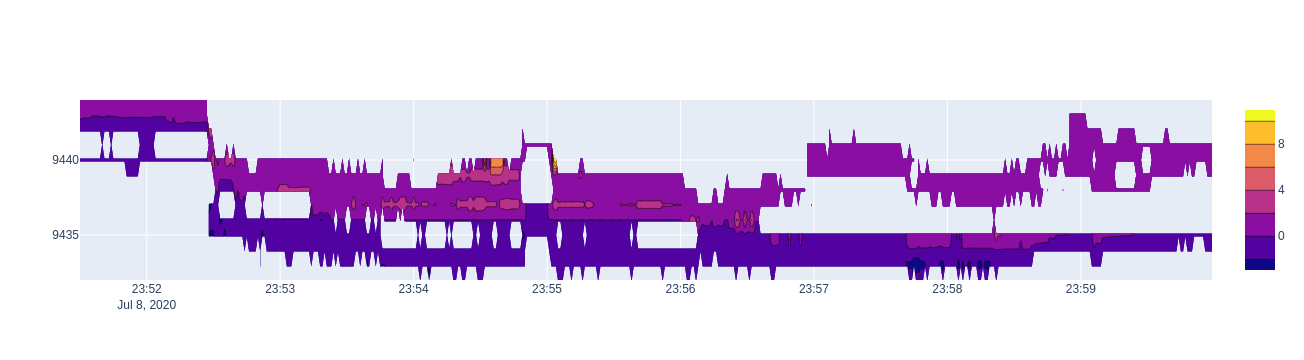

In [7]:
fig = go.Figure(
    data=go.Contour(z=pivot_df.values, x=pivot_df.columns, y=pivot_df.index)
)
fig.show()